## Import modules

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
# pd.set_option("max_columns", 200)

## Read the data

In [127]:
df = pd.read_csv("./coaster_db.csv")

In [128]:
df.shape

(1087, 56)

In [129]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [130]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [131]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Clean the data

In [132]:
# Drop undesired columns

df = df[['coaster_name', 'Status', 'Location', 'Manufacturer', 'year_introduced',
        'latitude', 'longitude', 'Type_Main', 'opening_date_clean',
        'speed_mph', 'height_ft', 'Inversions_clean', 'Gforce_clean']]

In [133]:
# Data types

df.dtypes

coaster_name           object
Status                 object
Location               object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [134]:
# Rename columns

def convertUppercase(columnName):
    if(len(columnName.split("_"))) > 1:
        str_split = columnName.split("_")
        if not (str_split[0].isupper() and str_split[1].isupper()):
            first = str_split[0].capitalize()
            second = str_split[1].capitalize()
            new_str = f"{first}_{second}"
            return new_str
    else:
        if not columnName.isupper():
            return columnName.capitalize()

df.columns = df.columns.to_series().apply(lambda x: convertUppercase(x))

In [135]:
df.columns

Index(['Coaster_Name', 'Status', 'Location', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_Mph',
       'Height_Ft', 'Inversions_Clean', 'Gforce_Clean'],
      dtype='object')

In [136]:
# Convert columns data types

df["Opening_Date"]  = pd.to_datetime(df["Opening_Date"], format="%Y-%m-%d")

In [137]:
# Missing values

df.isna().sum().sort_values(ascending=False)

Height_Ft           916
Gforce_Clean        725
Latitude            275
Longitude           275
Opening_Date        250
Status              213
Speed_Mph           150
Manufacturer         59
Coaster_Name          0
Location              0
Year_Introduced       0
Type_Main             0
Inversions_Clean      0
dtype: int64

In [138]:
# Duplicated data

df.loc[df.duplicated()]

,Coaster_Name,Status,Location,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean


In [139]:
# Finding duplicates in a given subset

df.loc[df.duplicated(subset=["Coaster_Name"])].head(10)

,Coaster_Name,Status,Location,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Removed,Crystal Beach Park,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Removed,Revere Beach,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Closed,Conneaut Lake Park,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,NaN,Other,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Operating,Canada's Wonderland,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
239,La Vibora,NaN,Other,Intamin,1986,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
241,Big Thunder Mountain Railroad,NaN,Other,Arrow Development (California and Florida)Dyna...,1987,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
252,La Vibora,NaN,Other,Intamin,1987,NaN,NaN,Steel,NaT,32.0,NaN,0,NaN
262,Flashback (Six Flags Magic Mountain),NaN,Other,Intamin,1988,NaN,NaN,Steel,NaT,35.0,NaN,0,3.0
270,Alpine Bobsled,NaN,Other,Intamin,1989,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN


In [140]:
# Checking a subset for duplicates

df.query("Coaster_Name == 'Crystal Beach Cyclone'")

,Coaster_Name,Status,Location,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Removed,Crystal Beach Park,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Removed,Crystal Beach Park,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [141]:
# Finding the values that are not duplicated in this subset and resetting index

df = df.loc[~df.duplicated(subset=["Coaster_Name", "Location", "Opening_Date"])] \
    .reset_index(drop=True)

In [142]:
df.shape

(990, 13)

## Feature Understanding
### Univariate Analysis

In [143]:
df["Year_Introduced"].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

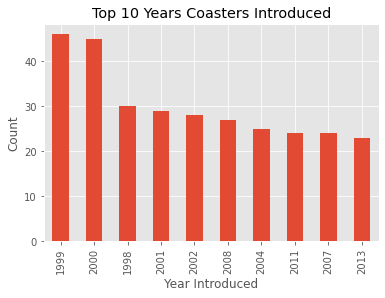

In [144]:
# Bar plot - Year Introduced

ax = df["Year_Introduced"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="Top 10 Years Coasters Introduced")

ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")

Text(0.5, 0, 'Speed (Mph)')

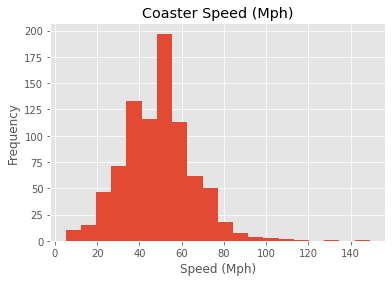

In [145]:
# Histogram - Coaster Speed

ax = df["Speed_Mph"].plot(kind="hist", bins=20, title="Coaster Speed (Mph)")

ax.set_xlabel("Speed (Mph)")

Text(0.5, 0, 'Speed (Mph)')

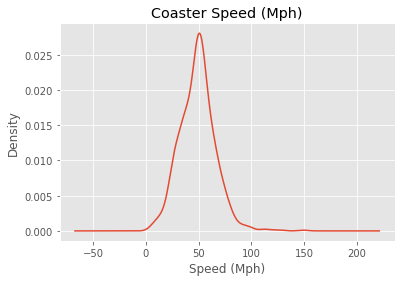

In [146]:
# Density plot - Coaster Speed

ax = df["Speed_Mph"].plot(kind="kde", title="Coaster Speed (Mph)")

ax.set_xlabel("Speed (Mph)")

## Feature Relationships

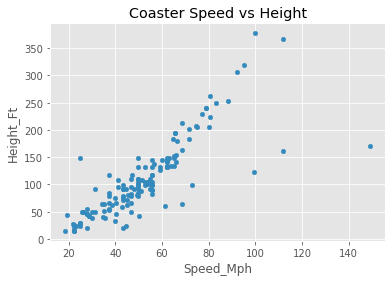

In [147]:
# Scatter plot

df.plot(kind="scatter", x="Speed_Mph", y="Height_Ft", title="Coaster Speed vs Height")

plt.show()

<AxesSubplot:xlabel='Speed_Mph', ylabel='Height_Ft'>

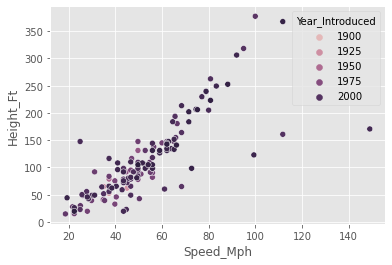

In [148]:
# Scatter plot (seaborn)

sns.scatterplot(data= df, x="Speed_Mph", y="Height_Ft", hue="Year_Introduced")

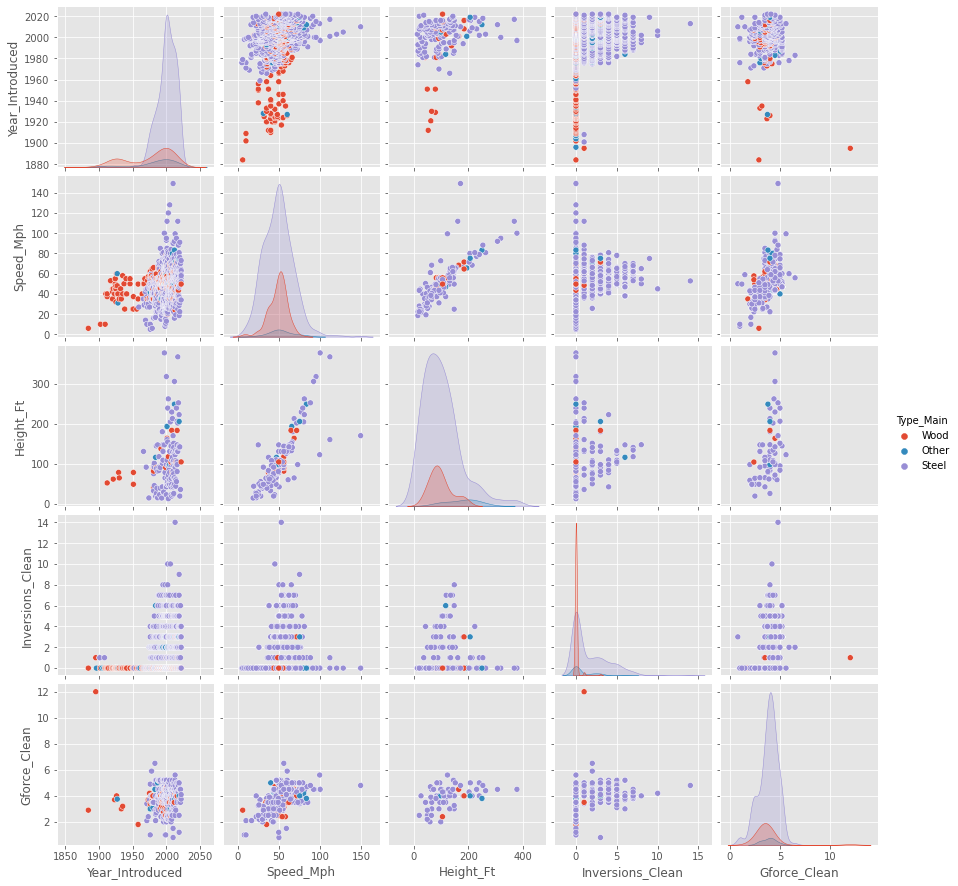

In [149]:
# Pair plot

sns.pairplot(data= df, vars=["Year_Introduced", "Speed_Mph", "Height_Ft", "Inversions_Clean", "Gforce_Clean"],
                        hue="Type_Main")

plt.show()

In [150]:
# Correlation

df_corr = df[["Year_Introduced", "Speed_Mph", "Height_Ft", "Inversions_Clean", "Gforce_Clean"]].dropna().corr()

df_corr

,Year_Introduced,Speed_Mph,Height_Ft,Inversions_Clean,Gforce_Clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_Mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_Clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_Clean,0.160247,0.607383,0.466482,0.275991,1.000000


<AxesSubplot:>

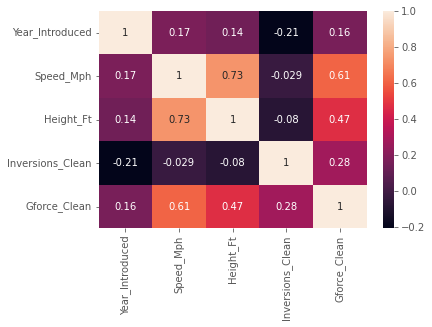

In [151]:
# Heatmap

sns.heatmap(df_corr, annot=True)

## What are the locations with the fastest roller coasters (min 10 coasters)?

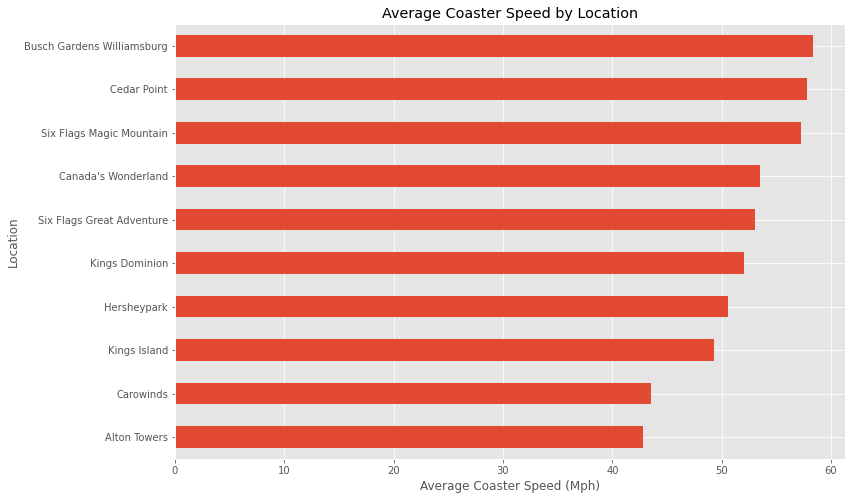

In [152]:
ax = df.query("Location != 'Other'") \
    .groupby("Location")["Speed_Mph"] \
        .agg(["mean", "count"]) \
            .query("count >= 10") \
                .sort_values("mean")["mean"] \
                    .plot(kind="barh", figsize=(12, 8), title="Average Coaster Speed by Location")

ax.set_xlabel("Average Coaster Speed (Mph)")

plt.show()